In [25]:
import numpy as np
from numpy.linalg import eig
from matplotlib import pyplot as plt

In [78]:
def x(N, P):
    J = np.matrix([[1.2-0.04*N-0.04*P, -0.04*N], 
               [0.02*P, 0.9-0.02*P+0.02*N]])
    eigenvalues = np.linalg.eig(J)[0]
    if any(abs(eigenvalues) > 1):
        return "Unstable"
    return "Stable"


In [79]:
x(0,0)

'Unstable'

In [80]:
x(0, -10)

'Unstable'

In [81]:
x(10, 0)

'Unstable'

In [82]:
x(6, 2)

'Stable'

In [83]:
J = np.matrix([[1.2-0.04*10-0.04*0, -0.04*10], 
               [0.02*0, 0.9-0.02*0+0.02*10]])
np.linalg.eig(J)

(array([0.8, 1.1]),
 matrix([[ 1. , -0.8],
         [ 0. ,  0.6]]))

In [75]:
def model(state):
    n, p= state
    return(1.2*n-0.02*n**2-0.04*n*p, 0.9*p-0.01*p**2+0.02*n*p)

In [76]:
initial = (2, 8)
x = []
y=[]
for i in range(100):
    initial = model(initial)
    x.append(initial[0])
    y.append(initial[1])


(0.0, 10.0)

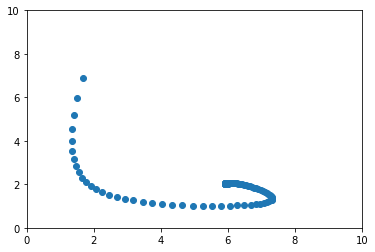

In [77]:
plt.scatter(x, y)
plt.xlim([0, 10])
plt.ylim([0,10])

In [84]:
def P(p, d):
    return ((1 - p**(d-1))/(1-p**d)) * p

In [97]:
def G(p, d):
    return ((p**d) * (1 - p)) / (1 - p**d)

In [98]:
P2 = P(0.7857, 7)

In [99]:
G2 = G(0.7857, 7)

In [100]:
P3 = P(0.6758 , 8)

In [101]:
G3 = G(0.6758, 8)

In [102]:
P4 = P(0.7425 , 6)

In [136]:
G4 = G(0.7425 , 6)

In [167]:
A = np.diagflat([0.6747, G2, G3, G4, 0.8091 , 0.8091], -1)
np.fill_diagonal(A, [0, P2, P3, P4, 0, 0, 0.8091])
A[0,] = [0, 0, 0, 0, 127, 4, 80]

In [177]:
A

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.27000000e+02, 4.00000000e+00, 8.00000000e+01],
       [6.74700000e-01, 7.37106646e-01, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 4.85933545e-02, 6.61053937e-01, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 1.47460633e-02, 6.90667193e-01,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 5.18328073e-02,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        8.09100000e-01, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 8.09100000e-01, 8.09100000e-01]])

In [180]:
initial = np.matrix([[0],
           [30],
           [40],
           [30],
           [10],
           [10],
           [10]])

In [185]:
np.matmul(np.linalg.matrix_power(A, 10), initial)

matrix([[5.75109503e+02],
        [2.29784980e+03],
        [3.72237032e+02],
        [1.52970547e+01],
        [7.30169881e-01],
        [5.24392846e-01],
        [5.33052305e+00]])

In [184]:
np.linalg.eig(A)

(array([-0.08853853+0.11971321j, -0.08853853-0.11971321j,
         0.26625279+0.j        ,  0.37093228+0.j        ,
         0.74626636+0.21320062j,  0.74626636-0.21320062j,
         0.94528704+0.j        ]),
 array([[-7.76918653e-01+0.00000000e+00j, -7.76918653e-01-0.00000000e+00j,
         -5.69389661e-01+0.00000000e+00j, -4.71898759e-01+0.00000000e+00j,
         -1.26870327e-02-2.95302077e-01j, -1.26870327e-02+2.95302077e-01j,
          2.90965719e-01+0.00000000e+00j],
        [ 6.21809329e-01+9.01583286e-02j,  6.21809329e-01-9.01583286e-02j,
          8.15894785e-01+0.00000000e+00j,  8.69504043e-01+0.00000000e+00j,
         -9.34520339e-01+0.00000000e+00j, -9.34520339e-01-0.00000000e+00j,
          9.43002191e-01+0.00000000e+00j],
        [-3.83968924e-02-1.19767889e-02j, -3.83968924e-02+1.19767889e-02j,
         -1.00422871e-01+0.00000000e+00j, -1.45635863e-01+0.00000000e+00j,
         -7.34055530e-02+1.83659943e-01j, -7.34055530e-02-1.83659943e-01j,
          1.61218517e-01+0.000

In [172]:
abs(np.linalg.eig(A)[0])

array([0.14889702, 0.14889702, 0.26625279, 0.37093228, 0.77612369,
       0.77612369, 0.94528704])

In [198]:
a = np.linalg.eig(A)[1][:,6]

In [199]:
a

array([3.05731900e-01+0.j, 9.39468942e-01+0.j, 1.54427435e-01+0.j,
       8.56065025e-03+0.j, 4.63817598e-04+0.j, 3.92270060e-04+0.j,
       2.15067915e-03+0.j])

In [200]:
(1 / sum(a)) * a

array([2.16647416e-01+0.j, 6.65725488e-01+0.j, 1.09430206e-01+0.j,
       6.06623892e-03+0.j, 3.28669936e-04+0.j, 2.77969995e-04+0.j,
       1.52401198e-03+0.j])

In [203]:
B = A = np.diagflat([0.6747, G2, G3, G4, 0.8091 , 0.8091], -1)
np.fill_diagonal(B, [0, P2, P3, P4, 0, 0, 0.8091])
B[0,] = [0, 0, 0, 0, 150, 20, 100]

In [204]:
abs(np.linalg.eig(B)[0])

array([0.15124253, 0.15124253, 0.31371928, 0.31371928, 0.78061002,
       0.78061002, 0.95667464])

In [205]:
b = np.linalg.eig(B)[1][:,6]

In [206]:
(1 / sum(b)) * b

array([2.16647416e-01+0.j, 6.65725488e-01+0.j, 1.09430206e-01+0.j,
       6.06623892e-03+0.j, 3.28669936e-04+0.j, 2.77969995e-04+0.j,
       1.52401198e-03+0.j])

In [207]:
C = np.diagflat([0.6747, G2 + 0.05, G3+0.05, G4+0.05, 0.8091 , 0.8091], -1)
np.fill_diagonal(C, [0, P2+0.05, P3+0.05, P4+0.05, 0, 0, 0.8091])
C[0,] = [0, 0, 0, 0, 127, 4, 80]

In [211]:
abs(np.linalg.eig(C)[0])

array([0.32436831, 0.32436831, 1.17712194, 0.91051886, 0.91051886,
       0.46099968, 0.46099968])

In [213]:
c = np.linalg.eig(C)[1][:,2]

In [215]:
(1 / sum(c)) * c

array([0.31593618+0.j, 0.54654815+0.j, 0.11561835+0.j, 0.01715145+0.j,
       0.00148377+0.j, 0.00101988+0.j, 0.00224221+0.j])